# Dissertation - Chapter 1: Classical Application of NLP on Beige Books


By Charlie Smith, University of South Alabama

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in bbNoText.csv as bbSimple
bbSimple = pd.read_csv("bbNoText.csv")


In [17]:
# Check balance in bbSimple based on econ_index_change_dummy
print(bbSimple['econ_index_change_dummy'].value_counts())

econ_index_change_dummy
1    3650
0     676
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X and y are defined from the original unbalanced dataset bbSimple
X = bbSimple.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y = bbSimple['econ_index_change_dummy']

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=7)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
cv_predictions = cross_val_predict(model, X, y, cv=k)

# Calculate additional metrics
f1 = f1_score(y, cv_predictions)
precision = precision_score(y, cv_predictions)
recall = recall_score(y, cv_predictions)
auc = roc_auc_score(y, cv_predictions)
conf_matrix = confusion_matrix(y, cv_predictions)

# Print the metrics
print("Cross-Validation Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Accuracy: [0.83256351 0.83121387 0.85202312 0.8300578  0.83930636]
Mean CV Accuracy: 0.8370329332923948
F1 Score: 0.9083344168508647
Precision: 0.864390002474635
Recall: 0.9569863013698631
AUC: 0.5731677068979493
Confusion Matrix:
[[ 128  548]
 [ 157 3493]]


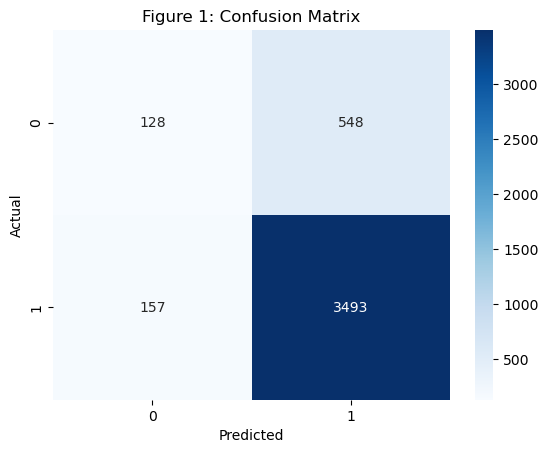

In [9]:
conf_matrix = confusion_matrix(y, cv_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 1: Confusion Matrix")
#plt.savefig("confusion_matrix_kfold.png")
plt.show()


In [9]:
from sklearn.metrics import classification_report  # Use appropriate metrics for your problem

class_report = classification_report(y, cv_predictions)
print(f'Classification Report:\n{class_report}')

# Note weakness in predicting 0s, which is expected given the class imbalance


Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.19      0.27       676
           1       0.86      0.96      0.91      3650

    accuracy                           0.84      4326
   macro avg       0.66      0.57      0.59      4326
weighted avg       0.80      0.84      0.81      4326



# Feature importance plot
Want to show how much each predictor mattered.

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
import matplotlib.pyplot as plt
import seaborn as sns

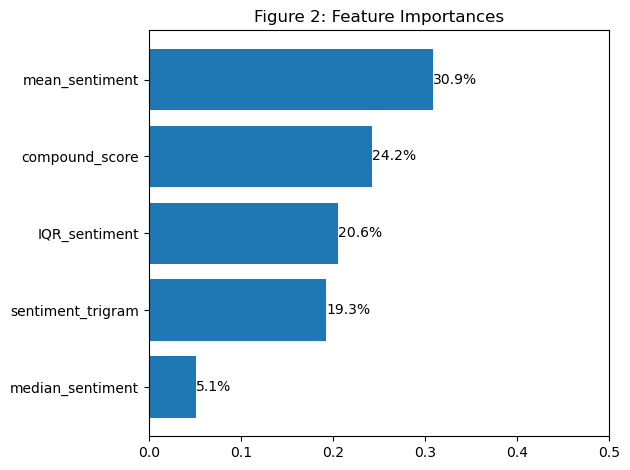

In [39]:
import matplotlib.pyplot as plt

# Train the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)

# Plot the feature importances
plt.figure()
plt.title("Figure 2: Feature Importances")
bars = plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlim([0, .5])

# Add labels to the bars
for bar, importance in zip(bars, importances[indices]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.1f}%'.format(importance*100), 
             va='center', ha='left', color='black')

plt.tight_layout()  # Adjust layout to prevent cutting off
plt.savefig("Feature_importances_kfold.png", bbox_inches='tight')


plt.show()


# Balanced dataset with SMOTE

In [19]:
# Use SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into X and y
X = bbSimple.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y = bbSimple['econ_index_change_dummy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Create a new dataframe with the balanced dataset
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.DataFrame(y_res, columns=['econ_index_change_dummy'])

bbBalanced = pd.concat([X_res, y_res], axis=1)

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=7)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X_res, y_res, cv=k, scoring='accuracy')
cv_predictions = cross_val_predict(model, X_res, y_res, cv=k)

# Calculate additional metrics
f1 = f1_score(y_res, cv_predictions)
precision = precision_score(y_res, cv_predictions)
recall = recall_score(y_res, cv_predictions)
auc = roc_auc_score(y_res, cv_predictions)
conf_matrix = confusion_matrix(y_res, cv_predictions)

# Print the metrics
print("Cross-Validation Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)


c:\Users\MCOB PHD 14\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\MCOB PHD 14\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\MCOB PHD 14\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\MCOB PHD 14\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarni

Cross-Validation Accuracy: [0.82363014 0.88099315 0.84589041 0.86643836 0.85958904]
Mean CV Accuracy: 0.8553082191780821
F1 Score: 0.8494029584744253
Precision: 0.8855444072835377
Recall: 0.8160958904109589
AUC: 0.8553082191780822
Confusion Matrix:
[[2612  308]
 [ 537 2383]]


Note how much AUC improves from using balanced dataset: Goes from 0.57 to 0.86


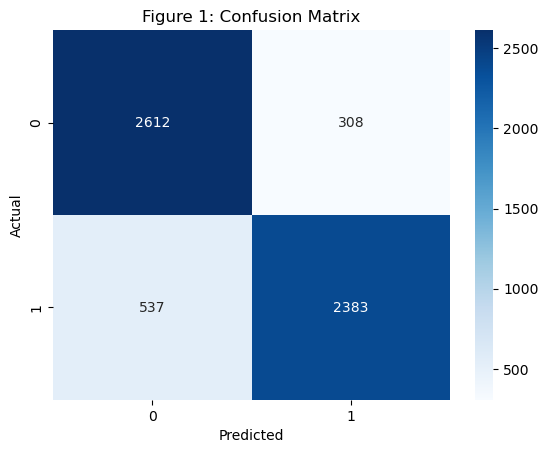

In [16]:
conf_matrix = confusion_matrix(y_res, cv_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 1: Confusion Matrix")
plt.savefig("confusion_matrix_kfold.png")
plt.show()


In [14]:
from sklearn.metrics import classification_report  # Use appropriate metrics for your problem

class_report = classification_report(y_res, cv_predictions)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2920
           1       0.89      0.82      0.85      2920

    accuracy                           0.86      5840
   macro avg       0.86      0.86      0.86      5840
weighted avg       0.86      0.86      0.86      5840



C:\Users\MCOB PHD 14\AppData\Local\Temp\ipykernel_24872\3011238122.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


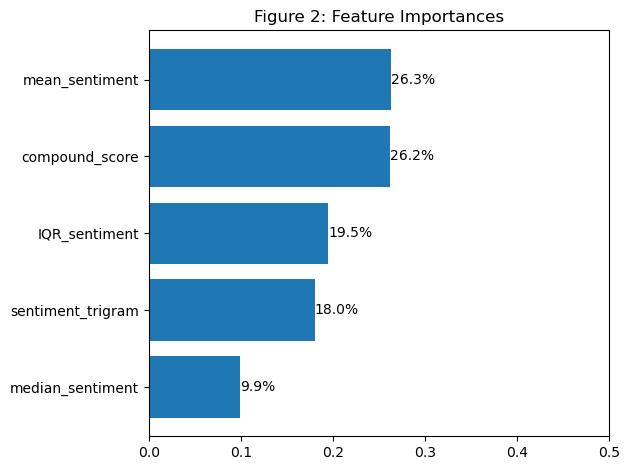

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
model.fit(X_res, y_res)

# Get feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)

# Plot the feature importances
plt.figure()
plt.title("Figure 2: Feature Importances")
bars = plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlim([0, .5])

# Add labels to the bars
for bar, importance in zip(bars, importances[indices]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.1f}%'.format(importance*100), 
             va='center', ha='left', color='black')

plt.tight_layout()  # Adjust layout to prevent cutting off
plt.savefig("Feature_importances_kfold.png", bbox_inches='tight')


plt.show()
